## CEO pay changes YOY

This workbook brings in the raw dataset, removes known mistakes, creates DataFrames for CEOs and CFOs only, and creates a series of charts analyzing pay components

In [2]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
starter_df = pd.read_csv('../datasets/raw_SCT_pay_file.csv')

starter_df.head(3)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN,False,False,False
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN,True,False,False
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN,False,False,False


In [4]:
#removing tickers with known mistakes
mistakes_df = pd.read_csv('../datasets/mistakes.csv').drop(columns='Unnamed: 0')
mistakes_df['ticker'].value_counts()

starter_df = starter_df[starter_df['ticker'].isin(set(mistakes_df['ticker'])) == False].reset_index(drop=True)

starter_df.head(3)

,id,cik,ticker,name,position,year,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total,changeInPensionValueAndDeferredEarnings,CEO,CFO,Interim
0,73b3a60ba203743c008330c96b7d8b66,1090872,A,Sam Raha,"Senior Vice President, President Diagnostics a...",2021,563500,0,1541332,0,738536,33534,3262887,NaN,False,False,False
1,97393f60cd9f321650e472673daaa70c,1090872,A,Michael R. McMullen,Chief Executive Officer,2021,1280000,0,9165390,0,3149714,77512,15967631,NaN,True,False,False
2,83b9cc2bca477fe8ce23e0ab56e70c66,1090872,A,Jacob Thaysen,"Senior Vice President, President Life Sciences...",2021,625000,0,1812285,0,897589,13684,3802349,NaN,False,False,False


In [5]:
#this code not needed but it flags CEOs, CFOs, and Interim appointments
#ceo_title_list = ['CHIEF EXECUTIVE','CEO']
#cfo_title_list = ['CHIEF FINANC','CFO']
#interim_title_list = ['INTERIM','ACTING']
#
#ceo_regstr = '|'.join(ceo_title_list)
#cfo_regstr = '|'.join(cfo_title_list)
#interim_regstr = '|'.join(interim_title_list)
#
## https://stackoverflow.com/questions/49508281/check-if-multiple-substrings-are-in-pandas-dataframe
#starter_df['CEO'] = starter_df['position'].str.upper().str.contains(ceo_regstr)
#starter_df['CFO'] = starter_df['position'].str.upper().str.contains(cfo_regstr)
#starter_df['Interim'] = starter_df['position'].str.upper().str.contains(interim_regstr)

##### Create separate DataFrames for CEOs and CFOs

In [6]:
ceo_df = starter_df[(starter_df['CEO']==True)]
ceo_df.reset_index(inplace=True)

ceo_2021_df = starter_df[(starter_df['CEO']==True) & (starter_df['year']==2021)]
ceo_2021_df.reset_index(inplace=True)

cfo_2021_df = starter_df[(starter_df['CFO']==True) & (starter_df['year']==2021)]
cfo_2021_df.reset_index(inplace=True)

In [7]:
ceo_df = ceo_df[(ceo_df['salary'] > 0) & (ceo_df['year'] > 2005)]

In [8]:
#https://www.statology.org/deciles-in-python/
percentile_ceo_2021 = np.percentile(ceo_df[ceo_df['year'] == 2021]['salary'], np.arange(0,100,5))
percentile_ceo_2020 = np.percentile(ceo_df[ceo_df['year'] == 2020]['salary'], np.arange(0,100,5))
percentile_ceo_2019 = np.percentile(ceo_df[ceo_df['year'] == 2019]['salary'], np.arange(0,100,5))
percentile_ceo_2018 = np.percentile(ceo_df[ceo_df['year'] == 2018]['salary'], np.arange(0,100,5))
percentile_ceo_2017 = np.percentile(ceo_df[ceo_df['year'] == 2017]['salary'], np.arange(0,100,5))
percentile_ceo_2016 = np.percentile(ceo_df[ceo_df['year'] == 2016]['salary'], np.arange(0,100,5))
percentile_ceo_2015 = np.percentile(ceo_df[ceo_df['year'] == 2015]['salary'], np.arange(0,100,5))
percentile_ceo_2014 = np.percentile(ceo_df[ceo_df['year'] == 2014]['salary'], np.arange(0,100,5))
percentile_ceo_2013 = np.percentile(ceo_df[ceo_df['year'] == 2013]['salary'], np.arange(0,100,5))
percentile_ceo_2012 = np.percentile(ceo_df[ceo_df['year'] == 2012]['salary'], np.arange(0,100,5))

data_list = [percentile_ceo_2012,percentile_ceo_2013,percentile_ceo_2014,percentile_ceo_2015,percentile_ceo_2016,percentile_ceo_2017,
            percentile_ceo_2018,percentile_ceo_2019,percentile_ceo_2020,percentile_ceo_2021]
index_list = [2012,2013,2014,2015,2016,2017,2018,2019,2020,2021]

percentile_df = pd.DataFrame(data_list,index=index_list,columns=[0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95])
percentile_df

,0,5,10,15,20,25,30,35,40,45,50,55,60,65,70,75,80,85,90,95
2012,1.0,200000.00,300000.0,358992.55,407444.0,453811.25,500000.0,525000.00,567424.8,600000.00,661009.5,724403.05,769961.8,818750.00,890129.6,950027.75,1000000.0,1050000.00,1185207.6,1424430.25
2013,1.0,200135.75,315000.0,375000.00,425000.0,475000.00,500000.0,547562.00,599039.0,626936.00,685802.0,743442.00,791923.0,840336.50,900000.0,967785.00,1000000.0,1067509.00,1200000.0,1450000.00
2014,1.0,207711.00,316202.0,382027.00,436539.0,490000.00,520000.0,559259.00,600000.0,650000.00,700000.0,750000.00,800000.0,850000.00,906115.0,971250.00,1000000.0,1069239.00,1200000.0,1459080.00
2015,1.0,231530.25,327805.0,390538.75,445000.0,493204.00,525000.0,575000.00,614054.0,650019.75,700000.0,750000.00,800576.0,861153.50,916318.5,980000.00,1000000.0,1084377.50,1225379.0,1478000.00
2016,1.0,213498.75,333800.0,399753.25,450000.0,495000.00,526929.9,577854.25,625000.0,664657.20,705480.5,753548.00,800333.6,865227.75,931211.7,991316.75,1000000.0,1094680.20,1235944.6,1481768.05
2017,1.0,196319.20,350000.0,407345.95,457569.4,500000.00,540000.0,600000.00,642000.0,693245.30,726789.5,772888.50,825000.0,875877.55,929182.6,996000.00,1004345.2,1100000.00,1241442.3,1429000.00
2018,1.0,204953.60,350000.0,415230.40,472576.8,508865.00,550000.0,600000.00,645833.0,700000.00,739231.0,778910.20,834918.0,896154.00,945000.0,999985.00,1013277.2,1109040.20,1250000.0,1460893.00
2019,1.0,212228.00,346211.6,408730.60,474700.2,500000.75,550000.0,599520.20,646538.6,700000.00,750000.0,792589.60,841828.0,900000.00,950000.0,999999.25,1023692.4,1128158.50,1250000.0,1498262.50
2020,1.0,206250.00,318462.0,400000.00,452083.0,500000.00,540000.0,582950.00,619500.0,659860.00,706410.0,753846.00,800000.0,850000.00,908654.0,960577.00,1000467.0,1096485.50,1218750.0,1417366.50
2021,1.0,234518.85,372587.1,449922.70,500000.0,543625.75,590074.7,628834.10,674645.6,720000.00,757750.0,810687.40,852794.8,900732.45,962718.5,1000000.00,1047937.6,1140019.25,1250000.0,1488216.70


In [9]:
sns.crayon_palette

<function seaborn.palettes.crayon_palette(colors)>

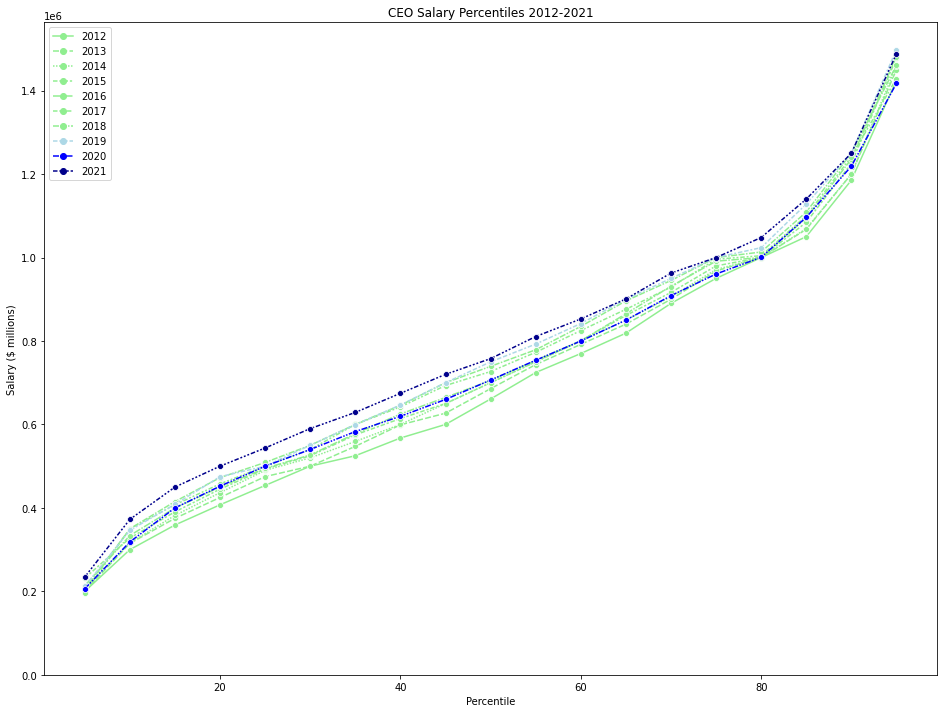

In [10]:
my_palette = ['lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightgreen','lightblue','blue','darkblue']
my_size = [0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5,0.5]
my_marker = ['o','o','o','o','o','o','o','o','o','o']

plt.figure(figsize=(16,12))
sns.lineplot(data=percentile_df.drop(columns=[0]).T,
                palette=my_palette,
                markers=my_marker,)
#                sizes=my_size)
plt.title('CEO Salary Percentiles 2012-2021')
plt.ylim(0,)
plt.xlabel("Percentile")
plt.ylabel("Salary ($ millions)")
plt.savefig("../images/ceo_percentiles.png");

## Plots for CEO Pay Components
#### Salary

In [60]:
ceo_df['year'] = ceo_df['year'].astype('category')

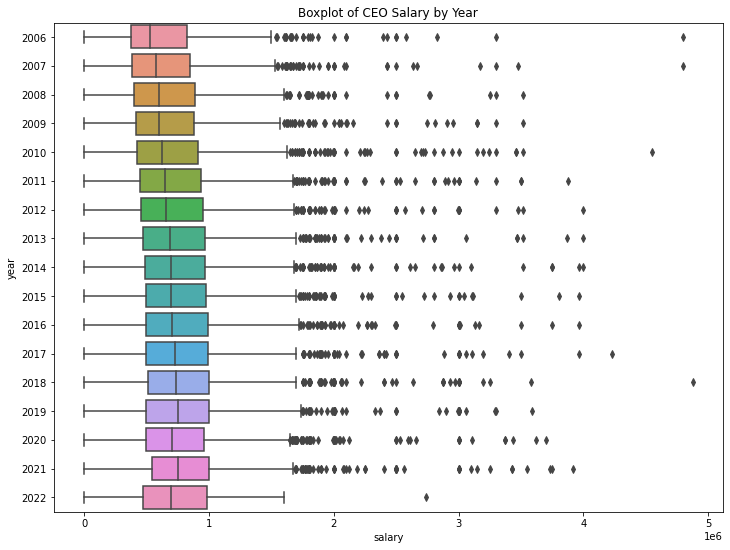

In [61]:
plt.figure(figsize=(12,9))
sns.boxplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')
plt.title("Boxplot of CEO Salary by Year");

<AxesSubplot:xlabel='salary', ylabel='year'>

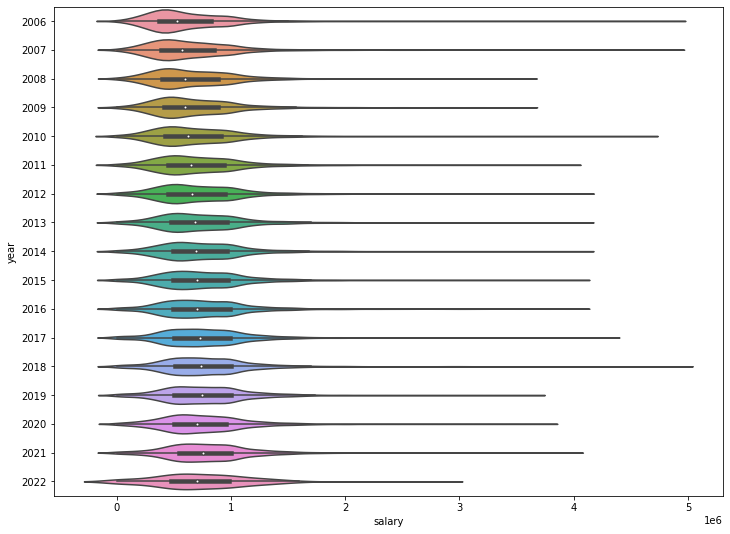

In [62]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['salary'] < 5000000],x='salary',y='year')

<Figure size 864x216 with 0 Axes>

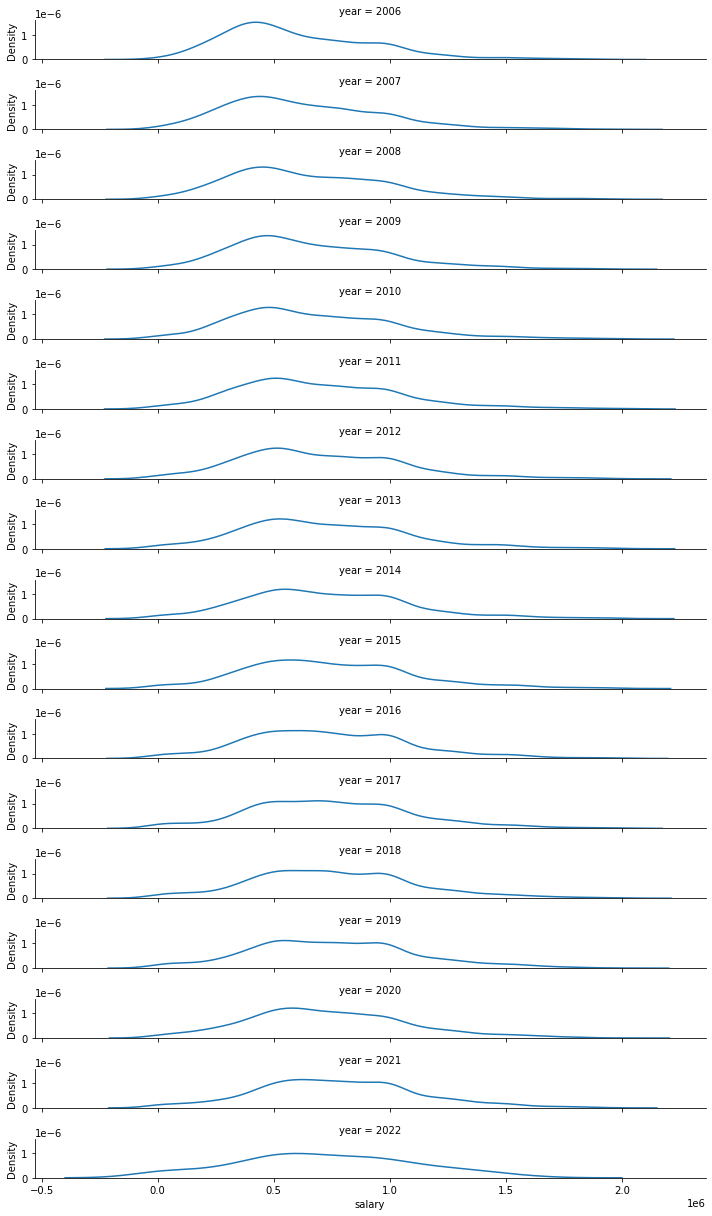

In [63]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['salary'] < 2000000], row='year',aspect=10,height=1)
g.map(sns.kdeplot, 'salary')#,bins=50,kde=True,stat='density')

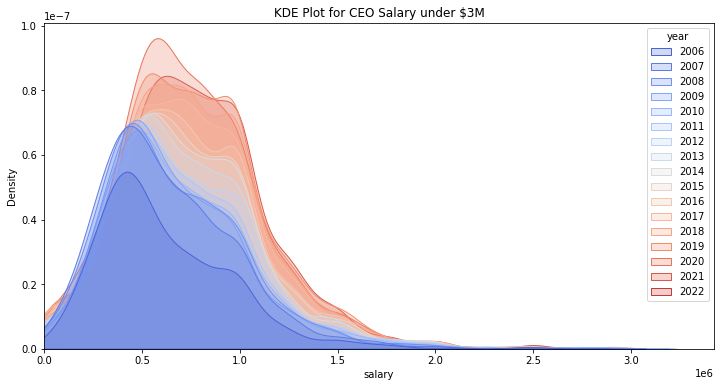

In [69]:
#sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 50000000],x='stockAwards',y='year')

plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['salary'] < 3000000)], x='salary',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for CEO Salary under $3M')
plt.xlim(0,)
plt.savefig('../images/ceo_salary.png');

#### Stock Awards

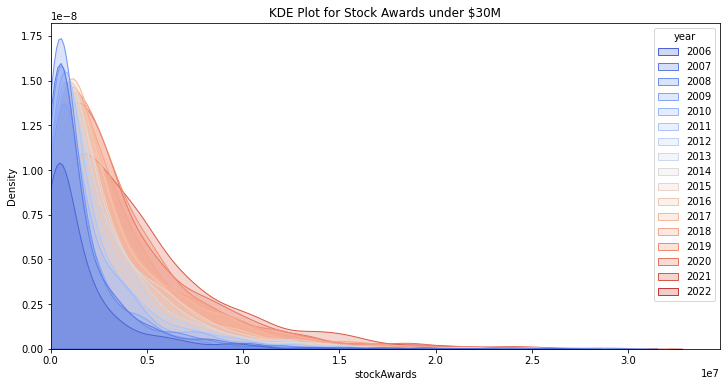

In [70]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['stockAwards'] < 30000000) & (ceo_df['stockAwards']>0)], x='stockAwards',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Stock Awards under $30M')
plt.xlim(0,)
plt.savefig('../images/ceo_stockawards.png');

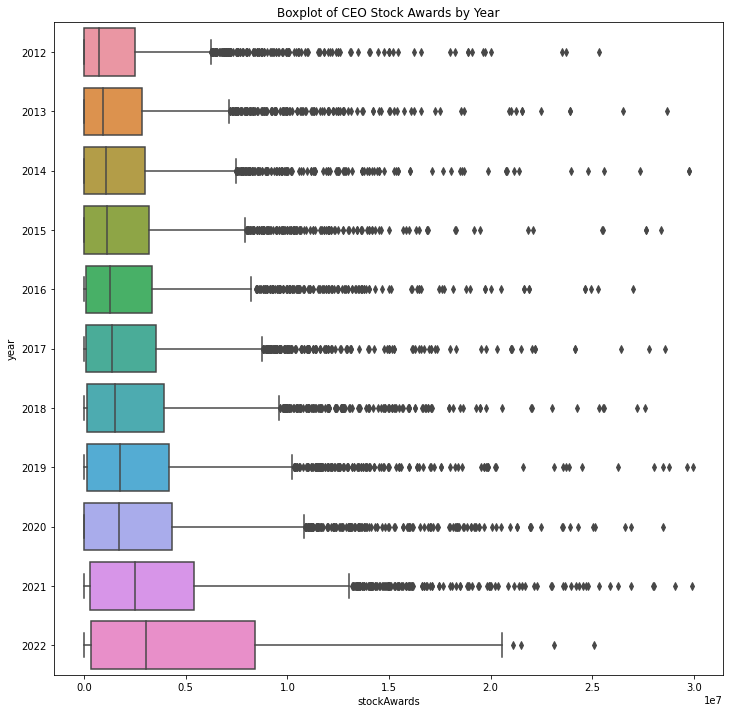

In [38]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')
plt.title('Boxplot of CEO Stock Awards by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

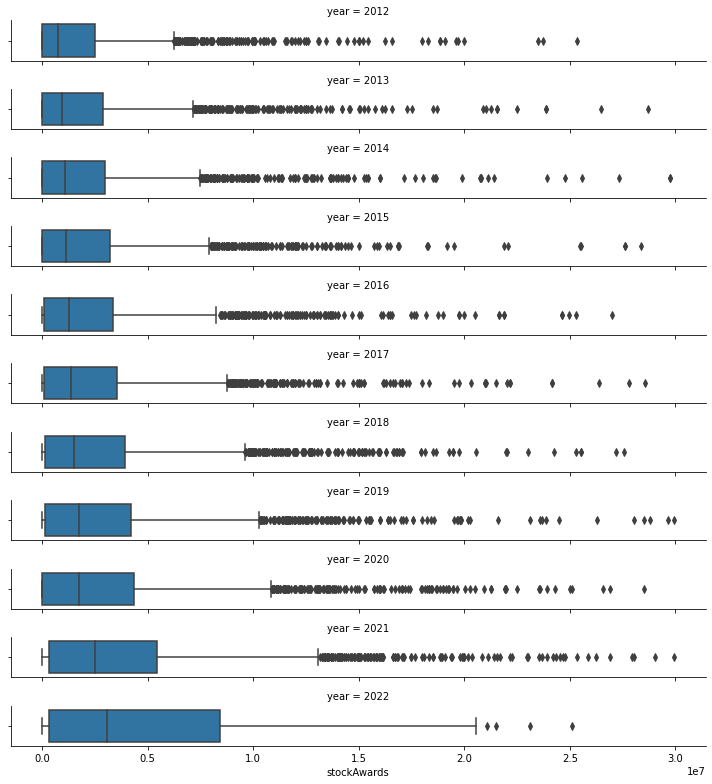

In [39]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['stockAwards'] < 30000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'stockAwards')

<AxesSubplot:xlabel='stockAwards', ylabel='year'>

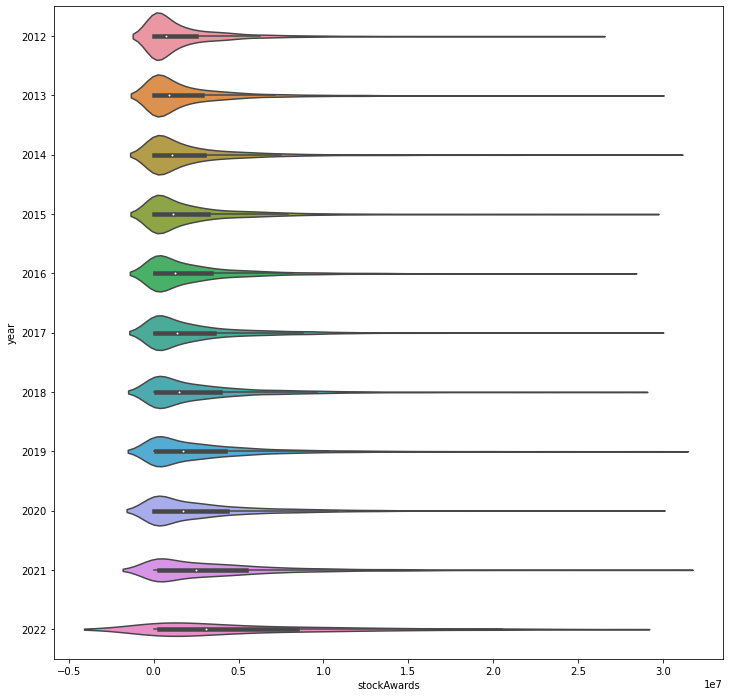

In [40]:
plt.figure(figsize=(12,12))
sns.violinplot(data=ceo_df[ceo_df['stockAwards'] < 30000000],x='stockAwards',y='year')

#### Performance Bonus Awards

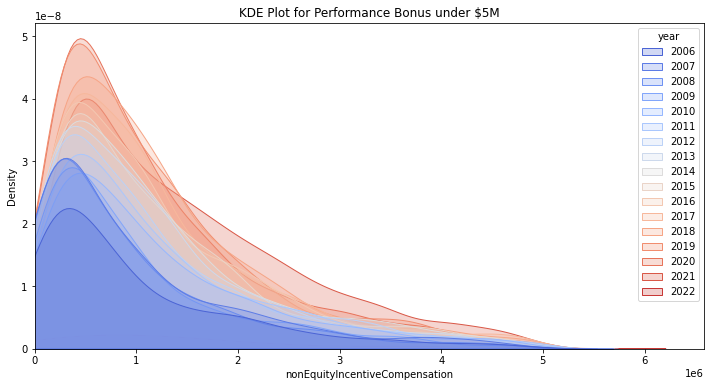

In [71]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['nonEquityIncentiveCompensation'] < 5000000) & (ceo_df['nonEquityIncentiveCompensation']>0)], 
            x='nonEquityIncentiveCompensation',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for Performance Bonus under $5M')
plt.xlim(0,);

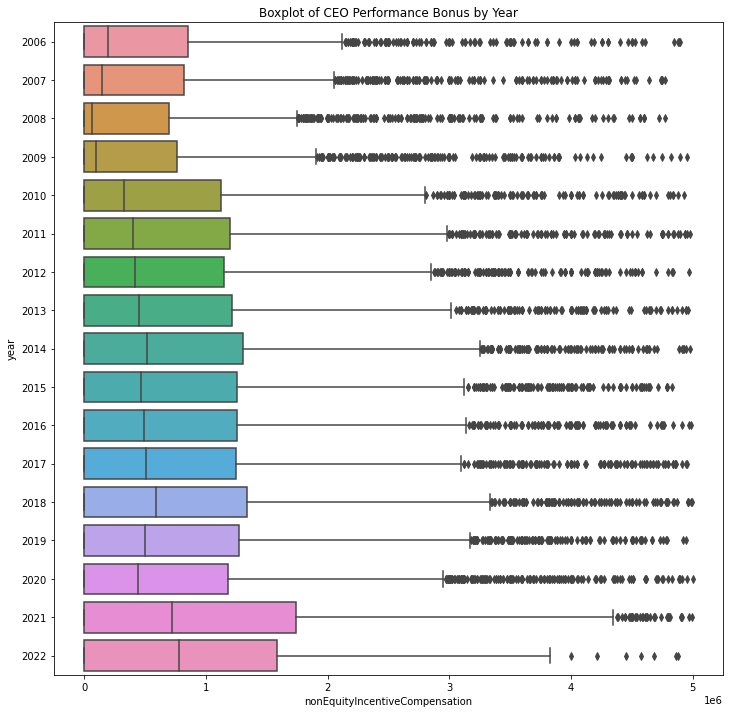

In [72]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.title('Boxplot of CEO Performance Bonus by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

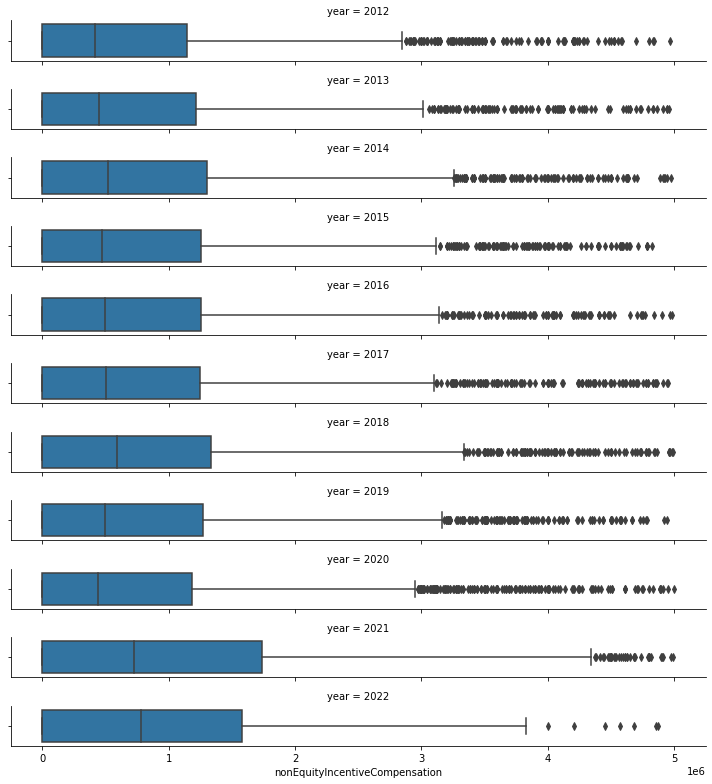

In [43]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'nonEquityIncentiveCompensation')

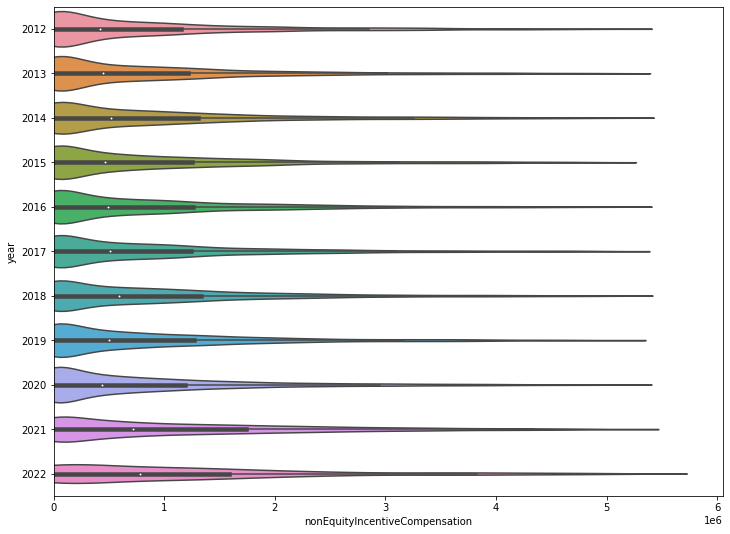

In [44]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['nonEquityIncentiveCompensation'] < 5000000],x='nonEquityIncentiveCompensation',y='year')
plt.xlim(0,);

#### SCT Total

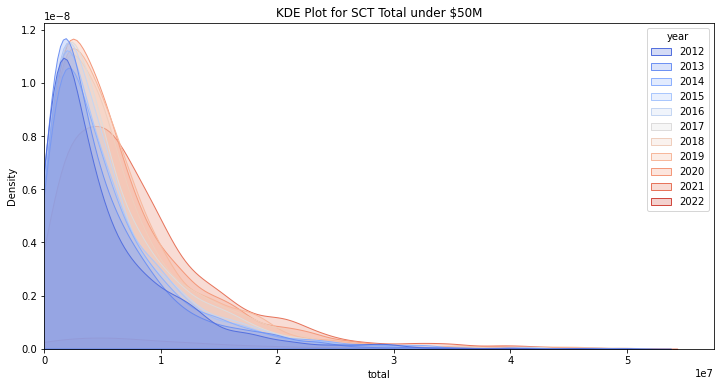

In [45]:
plt.figure(figsize=(12,6))
sns.kdeplot(data=ceo_df[(ceo_df['total'] < 50000000) & (ceo_df['total']>0)], 
            x='total',hue='year',palette='coolwarm',shade=True)
plt.title('KDE Plot for SCT Total under $50M')
plt.xlim(0,);

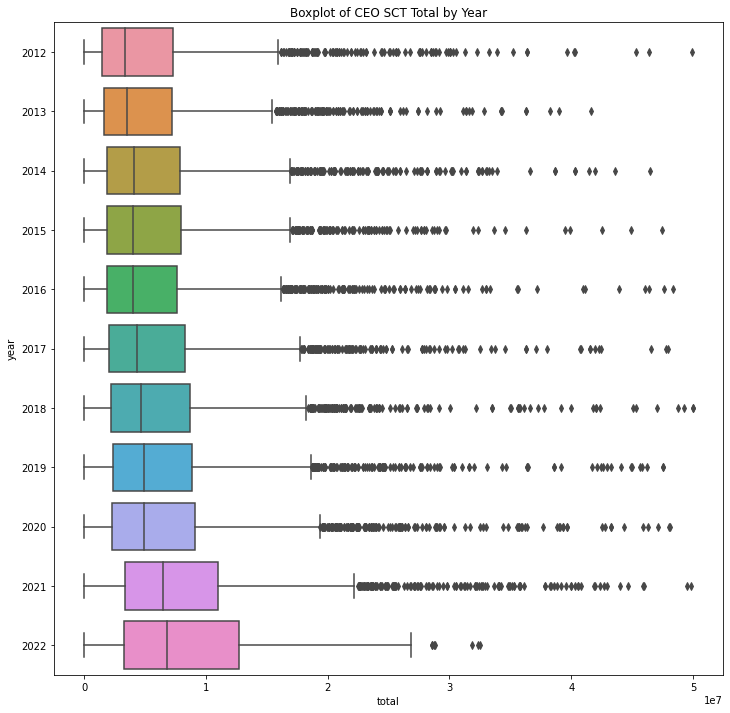

In [46]:
plt.figure(figsize=(12,12))
sns.boxplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.title('Boxplot of CEO SCT Total by Year');

C:\Users\reagins\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.10_qbz5n2kfra8p0\LocalCache\local-packages\Python310\site-packages\seaborn\axisgrid.py:670: UserWarning: Using the boxplot function without specifying `order` is likely to produce an incorrect plot.
  warnings.warn(warning)


<Figure size 864x216 with 0 Axes>

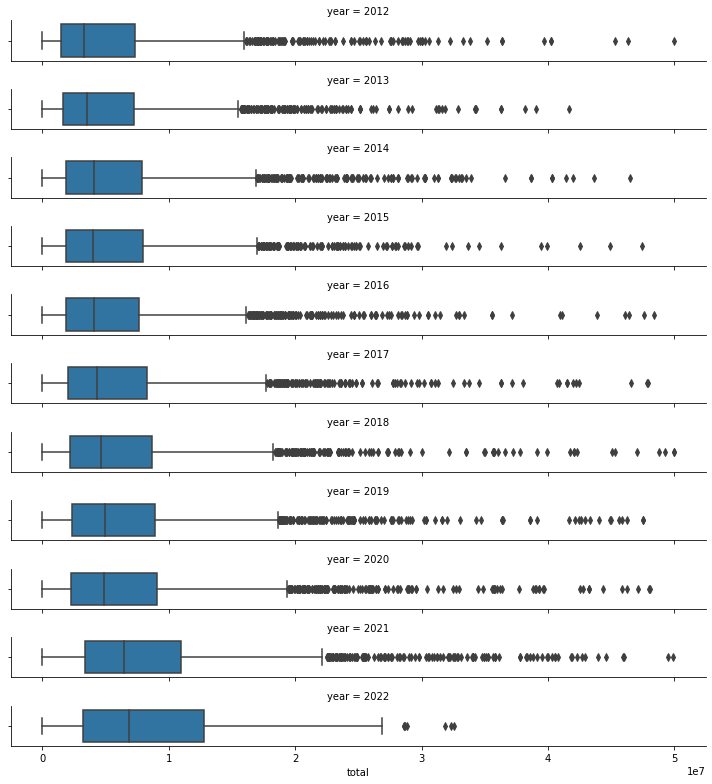

In [47]:
plt.figure(figsize=(12,3))
g = sns.FacetGrid(data=ceo_df[ceo_df['total'] < 50000000], row='year',aspect=10,height=1)
g.map(sns.boxplot, 'total')

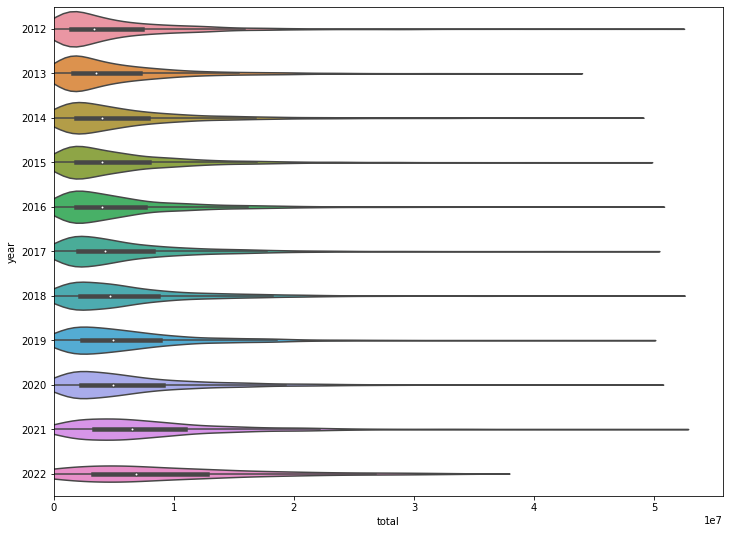

In [48]:
plt.figure(figsize=(12,9))
sns.violinplot(data=ceo_df[ceo_df['total'] < 50000000],x='total',y='year')
plt.xlim(0,);

In [49]:
print("Count of CEOs by year:")
print(starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum())

Count of CEOs by year:
year
2004       1
2005      53
2006    1435
2007    2001
2008    2063
2009    2026
2010    2061
2011    2115
2012    2187
2013    2330
2014    2382
2015    2446
2016    2531
2017    2674
2018    2797
2019    2949
2020    3040
2021    2813
2022     182
Name: CEO, dtype: int64


In [50]:
ceo_df['salary'].quantile(0.99)

2000000.0

In [51]:
ticker_series = starter_df.groupby('year')['ticker'].nunique()
ceo_series = starter_df[(starter_df['CEO'] == True) & (starter_df['Interim'] == False)].groupby('year')['CEO'].sum()

pd.DataFrame([ticker_series, ceo_series]).T

,ticker,CEO
year,,
2004,1,1
2005,49,53
2006,1196,1435
2007,1536,2001
2008,1576,2063
2009,1603,2026
2010,1634,2061
2011,1680,2115
2012,1742,2187


In [52]:
pd.set_option('display.float_format', lambda x: '%.0f' % x)
starter_df.drop(columns=['year','changeInPensionValueAndDeferredEarnings']).describe()

,cik,salary,bonus,stockAwards,optionAwards,nonEquityIncentiveCompensation,otherCompensation,total
count,172774,172774,172774,172774,172774,172774,172774,172774
mean,907963,481363,931896,1493095,1425116,966832,441096,3292493
std,509158,367194,149921671,55942801,184662312,83971598,91501722,17040946
min,1750,0,0,0,0,0,0,0
25%,723125,288000,0,0,0,0,8560,785622
50%,940942,412946,0,337822,0,180000,26206,1656949
75%,1307954,600000,9002,1170596,332156,547858,80606,3532673
max,1915657,20000000,52320562950,17980451374,49999911100,18771084337,37361610730,5682146331


Text(0, 0.5, 'Amount in $10M')

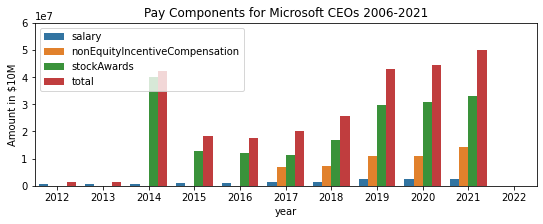

In [53]:
plt.figure(figsize=(9,3))
sns.barplot(data=pd.melt(ceo_df[ceo_df['ticker']=='MSFT'][['year','salary','nonEquityIncentiveCompensation','stockAwards','total']],
                    id_vars='year', var_name='component', value_name="amount"),
                x='year',y='amount', hue='component',ci=None)
plt.ylim(0,60000000)
plt.legend(loc='upper left')
plt.title('Pay Components for Microsoft CEOs 2006-2021')
plt.ylabel('Amount in $10M')

In [54]:
pd.melt(ceo_df[ceo_df['ticker']=='F'][['year','salary','nonEquityIncentiveCompensation','stockAwards','total']],
                    id_vars='year', var_name='component', value_name="amount")

,year,component,amount
0,2021,salary,1700000
1,2020,salary,1425000
2,2020,salary,1800000
3,2019,salary,1800000
4,2019,salary,1800000
...,...,...,...
59,2014,total,22042128
60,2014,total,18596497
61,2013,total,23204534
62,2013,total,10170578
